# SC42150 - Statistical Signal Processing
## Python Assignment I: Stock Market Analysis

#### Team members

- Alexandra Ministeru (5509432)
- Weihong Tang (5473160)

---

## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npy` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## Stock market analysis

Lately you've been fascinated by the world of trading so you decided to learn more about it and see if you can learn any good strategies by examining the trading data and looking for patterns.

You are given a `.npy` file containing historical price data of various stocks. We will make the assumption that all the timeseries are just different realizations of the same stochastic process.

You will need to conduct the following steps to complete your investigation, each of which is worth 1 point:

1. Import the `.npy` file provided using `np.load()` as indicated below. You should now have access to a $N\times K$ array, containing $K$ timeseries of historical price data of various stocks, each of length $N$. Plot the first one and also, in a new figure, plot the first 100 of them together.

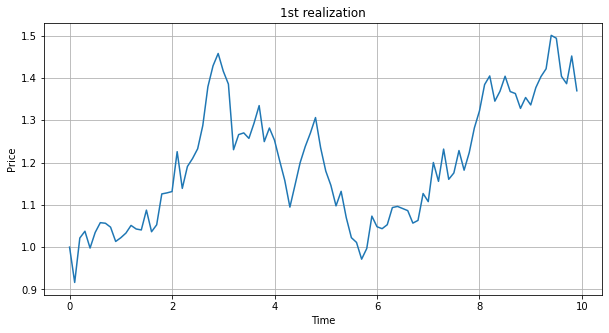

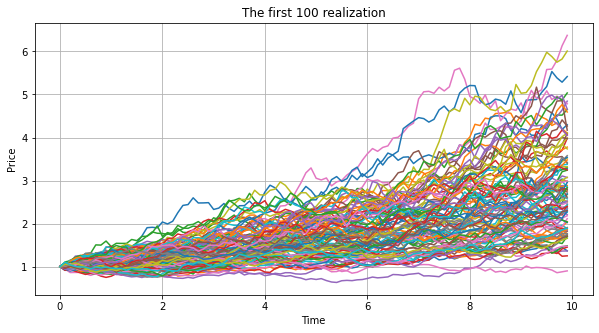

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

with open('data.npy', 'rb') as f:
    t = np.load(f)
    S = np.load(f)

plt.figure(figsize=(10,5))
plt.plot(t,S[:,0])
plt.title('1st realization')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t,S[:,0:100])
plt.title('The first 100 realization')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()

We will denote the generating stochastic process with $S_{n}\sim f_{S_{n}}$, where $n=t\Delta t$ refers to the time index. Further, we will denote its $k$-th realization with $S_{n}^{k}$.

2. Compute the ensemble mean and variance and plot each one.

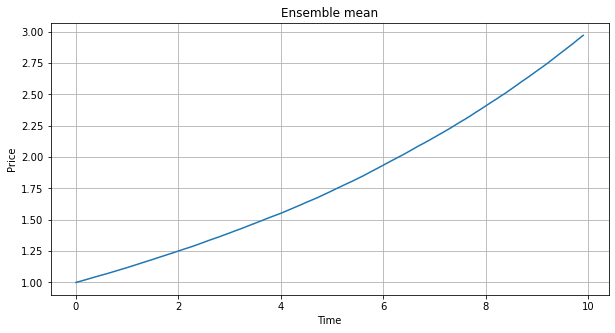

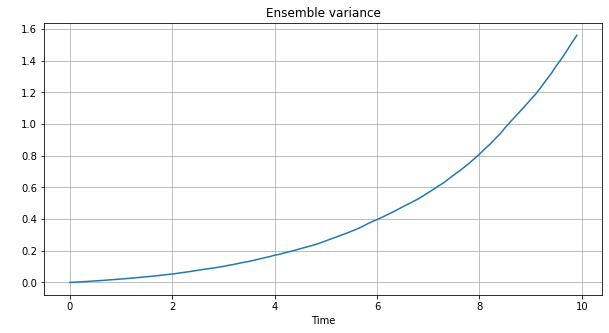

In [21]:
K = S.shape[1];
# Ensemble mean
mean = np.sum(S,axis=1)/K;
plt.figure(figsize=(10,5))
plt.plot(t,mean)
plt.title('Ensemble mean')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()

#Ensemble variance
remean = mean.reshape((100,1));
M = np.repeat(remean,repeats=K,axis=1);
variance = np.sum(np.square((S-M)),axis=1)/K;
plt.figure(figsize=(10,5))
plt.plot(t,variance)
plt.title('Ensemble variance')
plt.xlabel('Time')
plt.ylabel(' ')
plt.grid()
plt.show()

3. Compute the correlation matrix $R_{S}$ and visualize it using the `plt.matshow()` command. What can you deduce from that plot?

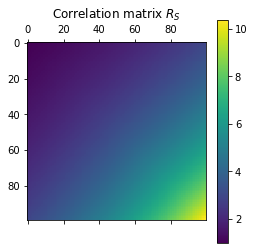

In [4]:
correlation = S.dot(S.T)/K;
plt.matshow(correlation)
plt.colorbar()
plt.title('Correlation matrix $R_{S}$');

> Auto-correlation function $r_{x}(k,l)$ does not only depend on the difference (k−l). With increasing time stamp, the value of the autocorrelation is increasing. The correlation matrix is also symmetrical, given that real values are used.

4. Can you determine whether the process $S_{n}$ is WSS or not? Explain why.

> $S_{N}$ is not WSS because the mean is not constant, as illustrated in the first plot of Question 2. Also, the Auto-correlation function $r_{x}(k,l)$ does not depend only on the difference (k−l).


A friend of yours who has been into trading for some time now, briefly looks at the data and tells you that the stock price changes can be explained by asset model like the following:
$$
    S_{n+1}=S_{n}e^{(\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{n}},\quad Z_{n}\sim\mathcal{N}(0,1)
    \label{asset_model} \tag{1}
$$
However, you have no idea what this model represents and what values the parameters $\mu$ and $\sigma$ should take. By inspecting the data you can at least infer that $\Delta t=0.1$ time units, so that's a start.

In your efforts to make sense of ([1](#mjx-eqn-asset_model)), you notice that if you divide $S_{n+1}$ by $S_{n}$ and then take the logarithm you end up with

$$
    \log \left( \frac{S_{n+1}}{S_{n}} \right) = (\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t}
    \label{tf_asset_model} \tag{2}
$$

This looks promising so you decide to try this transformation on the data you have.

5. Apply the transformation $X_{n+1}=\log\left(S_{n+1}/S_{n}\right)$ to your data, compute the ensemble mean and variance and plot them.

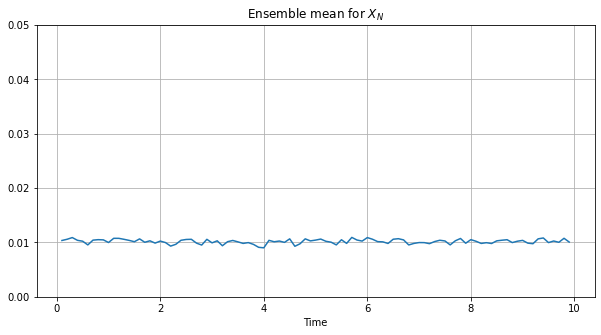

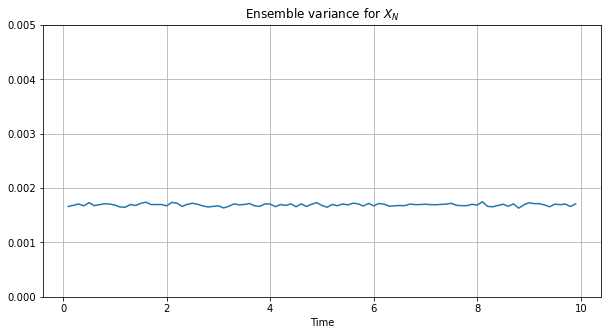

In [12]:
N = S.shape[0];
K = S.shape[1];
Sn=S[0:(N-1),:];
Sn1=S[1:N,:];
Xn1 = np.log(Sn1/Sn)

# Ensemble mean
K_Xn1 = Xn1.shape[1];
xmean = np.sum(Xn1,axis=1)/K_Xn1;
plt.figure(figsize=(10,5))
plt.plot(t[1:],xmean)
plt.title('Ensemble mean for $X_{N}$')
plt.xlabel('Time')
plt.ylim(0,0.05)
plt.grid()
plt.show()

#Ensemble variance
xmean.resize((99,1));
XM = np.repeat(xmean,repeats=K_Xn1,axis=1);
xvariance = np.sum(np.square((Xn1-XM)),axis=1)/K_Xn1;
plt.figure(figsize=(10,5))
plt.plot(t[1:],xvariance)
plt.title('Ensemble variance for $X_{N}$')
plt.xlabel('Time')
plt.ylim(0,0.005)
plt.grid()
plt.show()

6. Compute the correlation matrix $R_{X}$ and visualize it as before. Do you notice anything different?

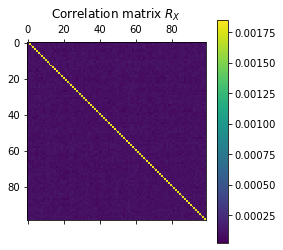

In [6]:
R_X = Xn1.dot(Xn1.T)/K_Xn1;
plt.matshow(R_X)
plt.colorbar()
plt.title('Correlation matrix $R_{X}$');

> The correlation matrix $R_{X}$ is a diagonal matrix. The entries on the diagonal have approximately the same value and the remaining elements are relatively small(close to 0). This indicates that the realizations of process $X_{N}$ tend to be uncorrelated.

7. Can you determine whether the process $X_{n}$ is WSS? If so, what are its first moments, i.e. mean and variance?

In [7]:
fm_mean = np.mean(xmean)
fm_var = np.mean(xvariance)
print('First moment of ensemble mean: ',fm_mean)
print('First moment of ensemble variance: ',fm_var)

First moment of ensemble mean:  0.010176848926115123
First moment of ensemble variance:  0.0016908747151488904


> Ensemble mean of $X_{N}$ is constant. The auto-correlation function $r_{x}(k,l)$ only depends on the difference (k−l), while the variance is finite (first element of $R_{X}$). According to the definition, $X_{N}$ is a WSS process. The first moment of the mean is approximately 0.010; the first moment of variance is 0.002.

8. Compute and plot the time average for a single realization of $X_{n}$, e.g. for $k=1$. Would you be able to say that $X_{n}$ is ergodic in the mean?

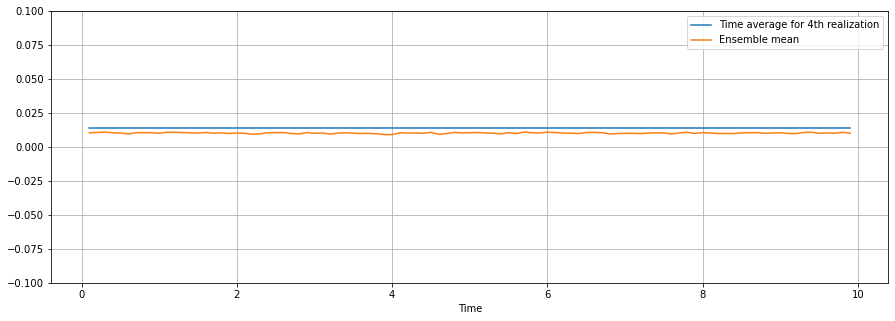

In [19]:
x3 = np.mean(Xn1[:,3])
plt.figure(figsize=(15,5))
plt.plot(t[1:],x3*np.ones(Xn1.shape[0]),label='Time average for 4th realization')
plt.plot(t[1:],xmean,label='Ensemble mean')
plt.legend()
plt.xlabel('Time')
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()

> The mean of the realizations is approximatively equal to the mean of the process. Therefore, the mean of $X_{N}$ can be estimated based on the mean of a single realization. Thus, $X_{N}$ is ergodic in mean.

According to ([2](#mjx-eqn-tf_asset_model)), $X_{t}$ should be Gaussian White Noise since $Z_{t}$ is a Gaussian ZMWN. However, since you are only given data, it's good that you verify this. Remember that a stochastic process is Gaussian if the joint distribution of any combination of elements of $X_n$ is Gaussian. For now we will just take two random time instances to verify this, but feel free to try other combinations as well.

9. Take two time instances of $X_{n}$, e.g. for $n=\{30,70\}$, and plot their 2d histogram across $K$ realizations $\{X_{n}^{k}\}_{k=1}^{K}$ by using $\sqrt{K}$ bins. Can you adequately fit a multivariate normal distribution on this histogram?

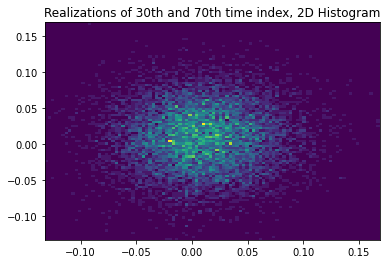

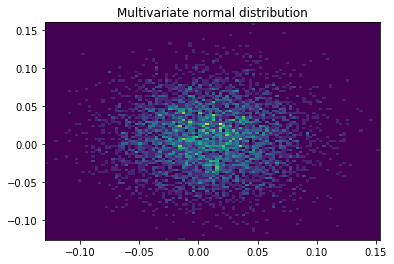

In [13]:
bins = int(np.sqrt(K))
plt.figure()
plt.hist2d(Xn1[29,:], Xn1[69,:], bins)
plt.title("Realizations of 30th and 70th time index, 2D Histogram")
plt.show()

x, y = np.random.multivariate_normal([np.mean(Xn1[29,:]), np.mean(Xn1[69,:])], [[xvariance[29], (R_X[29][69]-np.mean(Xn1[29,:])*np.mean(Xn1[69,:]))], [(R_X[69][29]-np.mean(Xn1[29,:])*np.mean(Xn1[69,:])), xvariance[69]]], 5000).T
plt.hist2d(x, y, bins)
plt.title("Multivariate normal distribution")
plt.show()

> Based on the second figure shown above, a multivariate normal can be adequately fitted on the histogram of the two time instances. The mean vector of the multivariate normal distribution is based on the means of 30th and 70th realizations, while the covariance matrix is based on the variances and covariances of the realizations.

10. Now verify that the marginals of the above distribution are also Gaussians, that is take the (1d) histograms of the above time instances (with $\sqrt{K}$ bins), plot them, and also fit the correspoding PDFs on top.

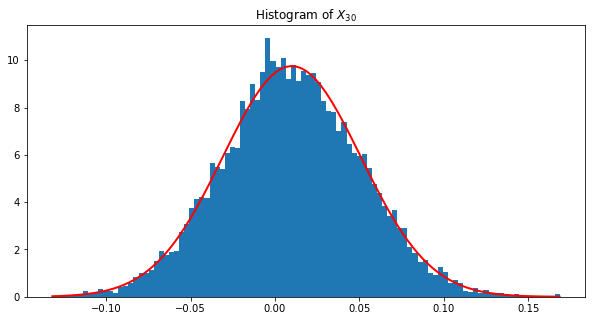

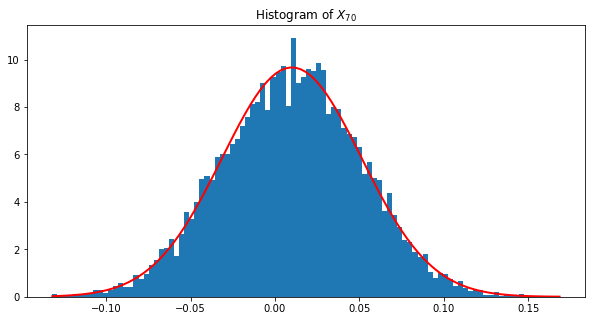

In [10]:
plt.figure(figsize=(10,5))
n1, bins, patches = plt.hist(Xn1[29,:], bins, density=True)
plt.title('Histogram of $X_{30}$')
mu1 = np.mean(Xn1[29,:])
sigma1 = np.std(Xn1[29,:])
pdf1 = (1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(bins - mu1)**2 /(2*sigma1**2)))
plt.plot(bins, pdf1, 'r', linewidth=2)
plt.show()

plt.figure(figsize=(10,5))
n2, bins, patches = plt.hist(Xn1[69,:], bins, density=True)
plt.title('Histogram of $X_{70}$')
mu2 = np.mean(Xn1[69,:])
sigma2 = np.std(Xn1[69,:])
pdf2 = (1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(bins - mu2)**2 /(2*sigma2**2)))
plt.plot(bins, pdf2, 'r', linewidth=2)
plt.show()


From ([1](#mjx-eqn-asset_model)), it follows that the first two statistical moments can be computed analytically:
\begin{align}
    \mathbb{E}\left[S_{n}\right] &= S_{0}e^{\mu n\Delta t} \label{asset_mean} \tag{3}\\
    \text{Var}\left[S_{n}\right] &= S_{0}^{2}e^{2\mu n\Delta t}\left(e^{\sigma^{2}n\Delta t}-1\right) \label{asset_var} \tag{4}
\end{align}
Having computed the ensemble mean and variance of $X_{n}$ you should be able to determine estimates for the values of $\mu$ and $\sigma$.

11. Using the results from Question 7, compute estimates for $\mu$ and $\sigma$. Use those estimates to calculate the moments ([3](#mjx-eqn-asset_mean))-([4](#mjx-eqn-asset_var)) and plot those along with the ensemble moments of $S_{n}$ of Question 2.

mu =  [[0.11022286]]
sigma =  [[0.13003364]]


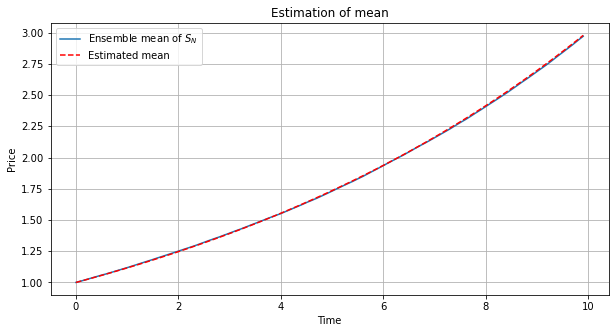

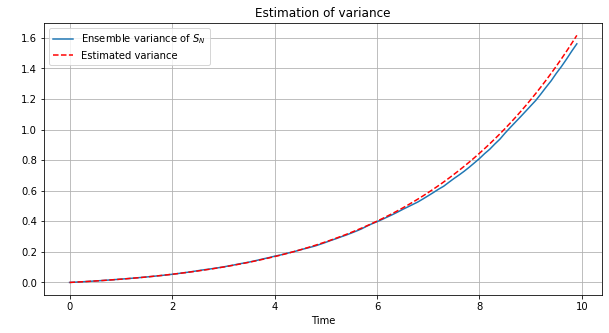

In [20]:
dt = 0.1

A = np.matrix([[dt, -0.5*dt], [0, dt]])
b = np.matrix([[fm_mean], [fm_var]])
x = np.linalg.solve(A, b)

print('mu = ', x[0])
print('sigma = ', np.sqrt(x[1]))

S0 = mean[0]
E_Sn = np.zeros(100)
for i in range(0,100):
    E_Sn[i] = S0*np.exp(x[0]*i*dt)
    
Var_Sn = np.zeros(100)
for i in range(0,100):
    Var_Sn[i] = (S0**2)*np.exp(2*x[0]*i*dt)*(np.exp(x[1]*i*dt)-1)

plt.figure(figsize=(10,5))
plt.plot(t,mean,label='Ensemble mean of $S_{N}$')
plt.plot(t,E_Sn,'r--',label='Estimated mean')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Estimation of mean')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, variance, label='Ensemble variance of $S_{N}$')
plt.plot(t, Var_Sn,'r--', label='Estimated variance')
plt.xlabel('Time')
plt.title('Estimation of variance')
plt.ylabel(' ')
plt.legend()
plt.grid()
plt.show()

12. Having done all the above, you should now be in a position where you can discuss whether the model your friend suggested was good enough to describe the data.

> The estimated model approximates the process appropriately, with a small visible error for variance. The model is therefore good enough to describe the data.